In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import json
import seaborn as sns
import networkx as nx
from collections import defaultdict
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud


In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 사용 가능한 한글 폰트명
mpl.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [9]:
file_path = "교과서_본문.json"  # 로컬 또는 Colab 경로로 수정 필요
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# 전체 본문 워드클라우드
- 주요 키워드 "조선", "고려", "고구려", "신라"

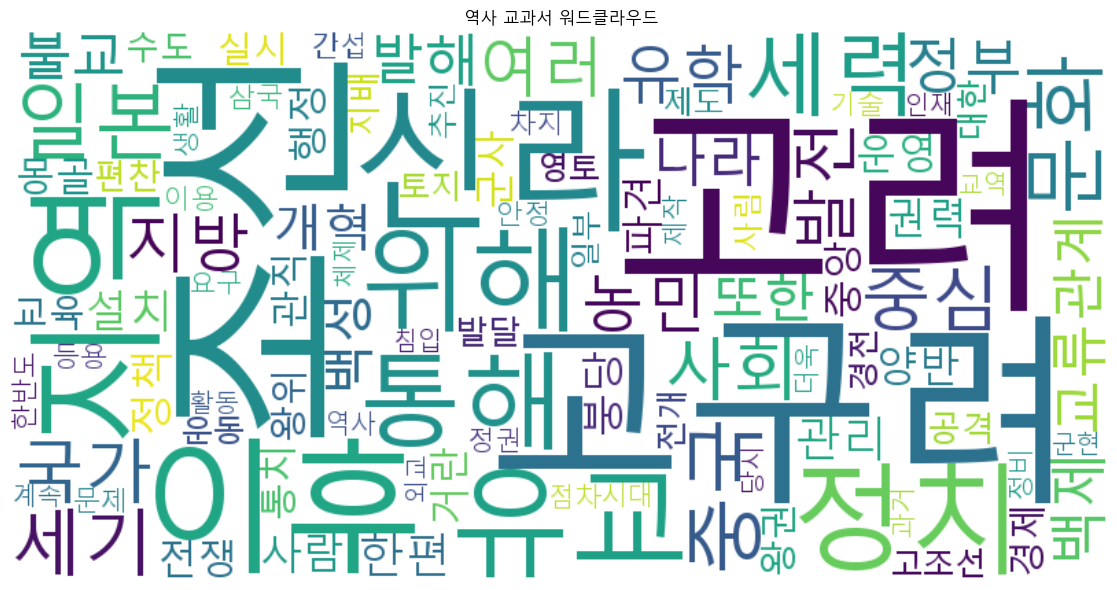

In [27]:

# 2. 전체 본문 텍스트 추출 및 합치기
texts = [item["content"] for item in data]
all_text = " ".join(texts)

# 3. 명사 추출 (1글자 제외)
okt = Okt()
nouns = okt.nouns(all_text)
filtered_nouns = [n for n in nouns if len(n) > 1]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_words = word_counts.most_common(100)

# 5. 워드클라우드 생성
wc = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf", 
    background_color="white",
    width=800,
    height=400
).generate_from_frequencies(dict(top_words))

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(" 역사 교과서 워드클라우드")
plt.tight_layout()
plt.show()


## 해당 키워드가 포함된 소주제별 워드클라우드

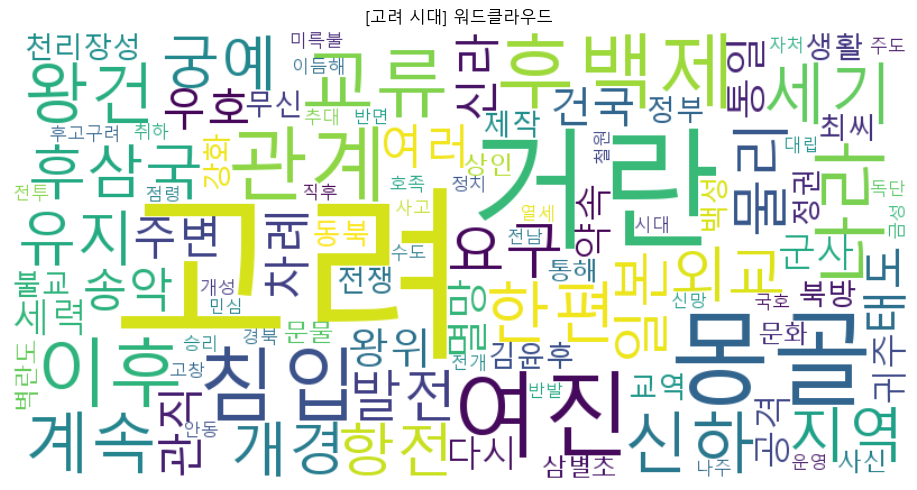

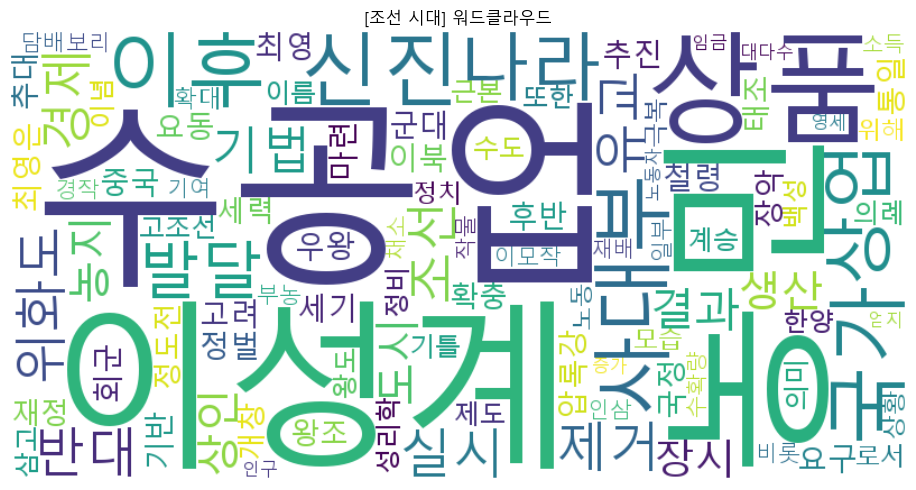

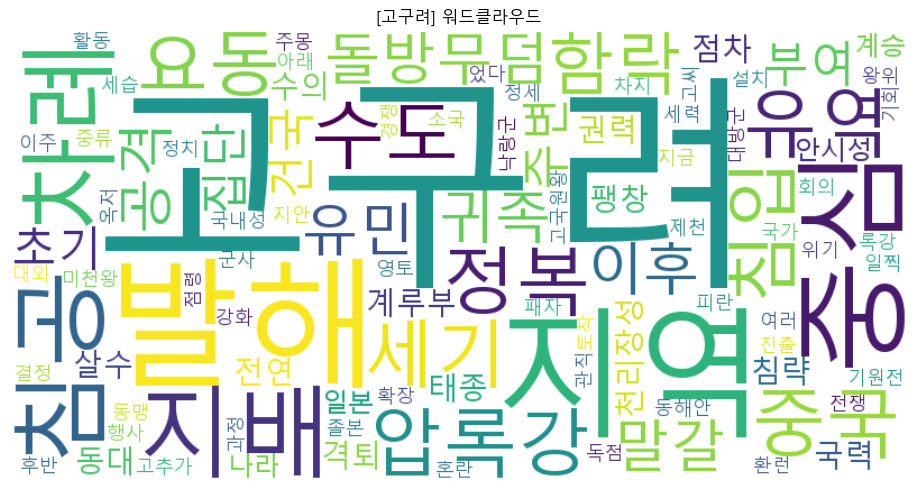

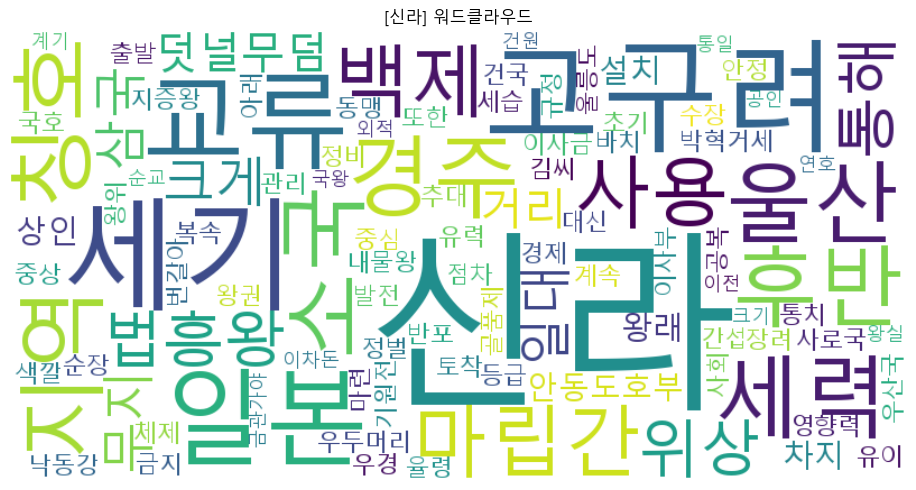

In [29]:
# 2. 데이터프레임 생성
df = pd.DataFrame(data)
df["title"] = df["metadata"].apply(lambda x: x["title"])

# 3. 소주제 필터링
goryeo_df = df[df["title"].str.contains("고려")]
joseon_df = df[df["title"].str.contains(r"(?<!고)조선")]  # '고조선' 제외
goguryeo_df = df[df["title"].str.contains("고구려")]
sin_df = df[df["title"].str.contains("신라")]

# 4. 형태소 분석기
okt = Okt()

# 5. 워드클라우드 함수
def generate_wordcloud(text, title, font_path="C:/Windows/Fonts/malgun.ttf"):
    nouns = okt.nouns(text)
    nouns = [n for n in nouns if len(n) > 1]
    word_freq = Counter(nouns)
    top_words = word_freq.most_common(100)

    wc = WordCloud(
        font_path=font_path,
        background_color="white",
        width=800,
        height=400
    ).generate_from_frequencies(dict(top_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"[{title}] 워드클라우드")
    plt.tight_layout()
    plt.show()

# 6. 워드클라우드 생성
generate_wordcloud(" ".join(goryeo_df["content"].astype(str)), "고려 시대")
generate_wordcloud(" ".join(joseon_df["content"].astype(str)), "조선 시대")
generate_wordcloud(" ".join(goguryeo_df["content"].astype(str)), "고구려")
generate_wordcloud(" ".join(sin_df["content"].astype(str)), "신라")


# 대단원별 워드클라우드

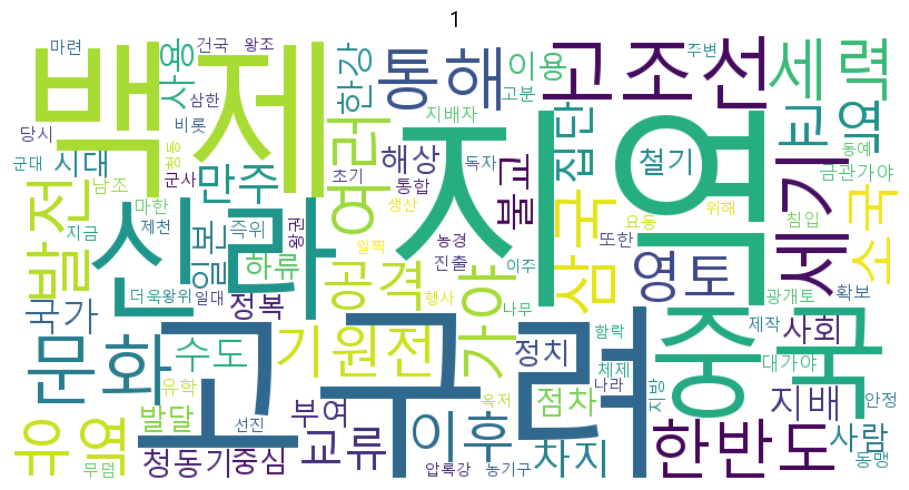

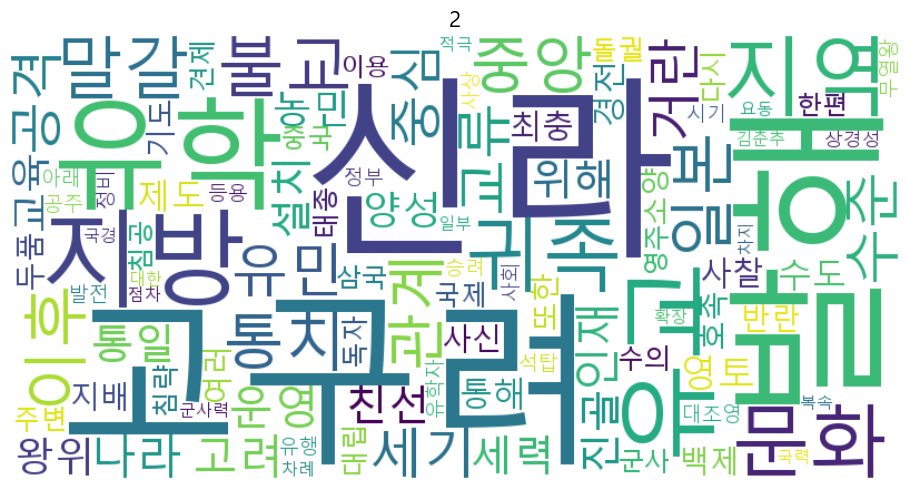

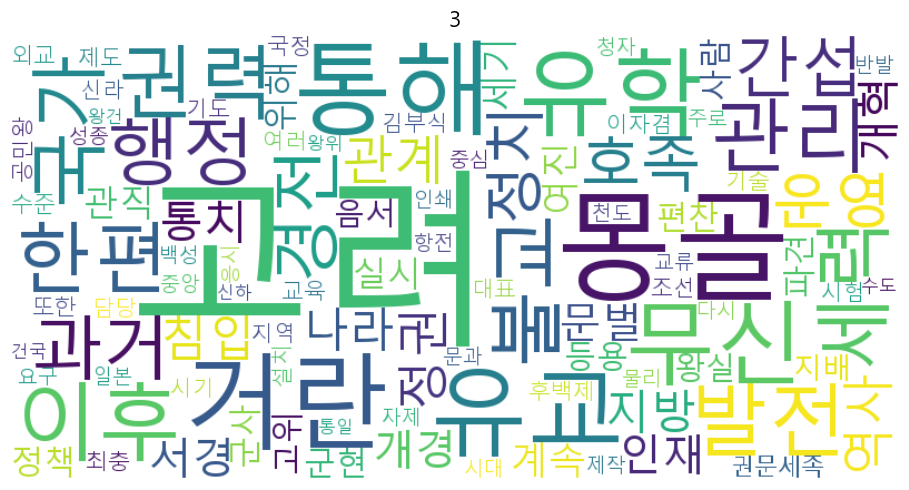

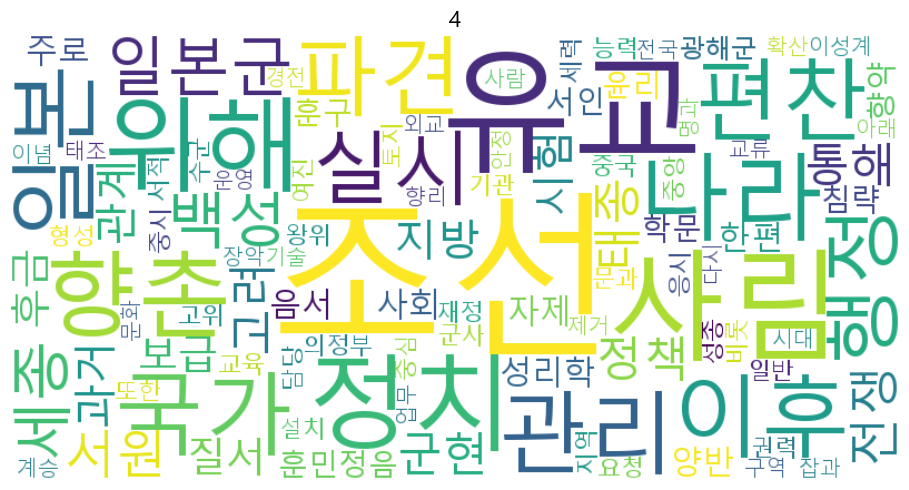

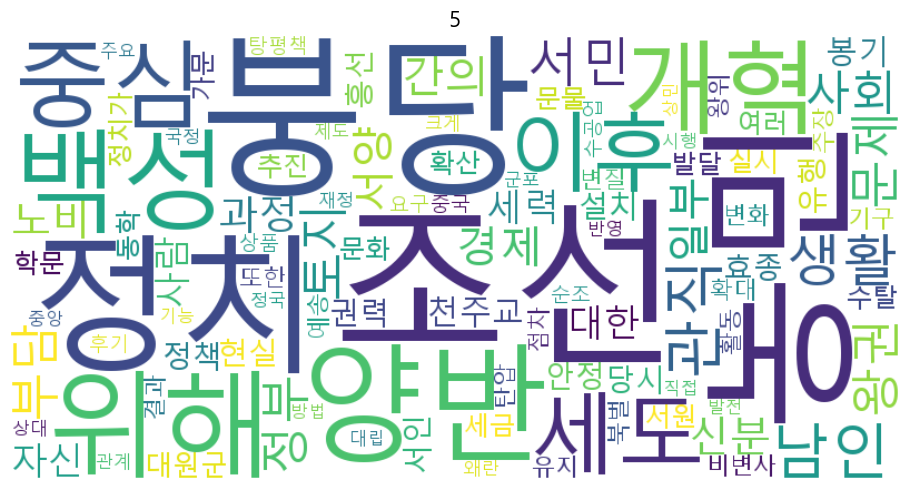

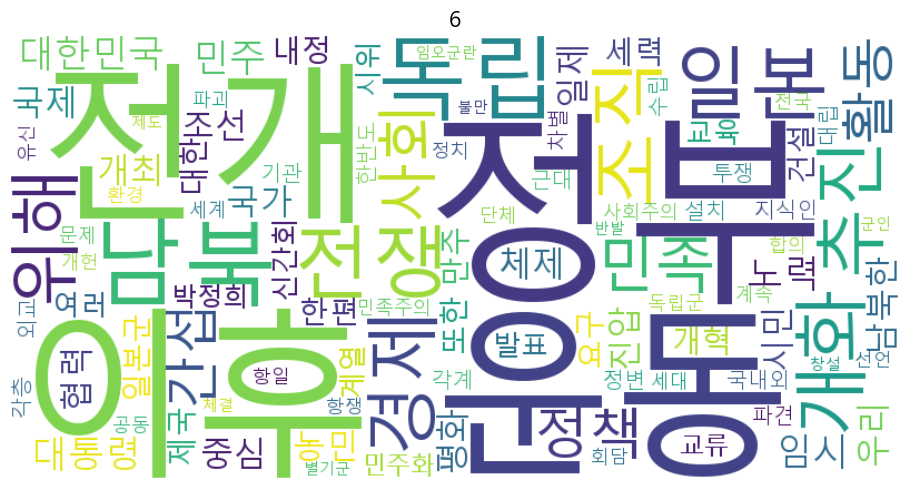

In [32]:
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt

# 1. 엑셀 파일 로드
df = pd.read_excel("교과서 데이터 정리본 계층형.xlsx")

# 2. 형태소 분석기 정의
okt = Okt()

# 3. 대단원별 워드클라우드 생성 함수
def generate_wordclouds_by_대단원(df, top_n=100):
    wordclouds = {}
    grouped = df.groupby("대단원")

    for 대단원명, group in grouped:
        text = " ".join(str(x) for x in group["본문"])
        nouns = okt.nouns(text)
        nouns = [n for n in nouns if len(n) > 1]
        counts = Counter(nouns).most_common(top_n)

        wc = WordCloud(
            font_path="C:/Windows/Fonts/malgun.ttf",  # Windows 기본 한글 폰트 경로
            width=800,
            height=400,
            background_color="white"
        ).generate_from_frequencies(dict(counts))

        wordclouds[대단원명] = wc
    
    return wordclouds

# 4. 워드클라우드 생성
wordclouds = generate_wordclouds_by_대단원(df)

# 5. 시각화
for title, wc in wordclouds.items():
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title}", fontsize=16)
    plt.tight_layout()
    plt.show()